In [1]:
#Loading the required modules
 
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt

In [2]:
#Defining our function 
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points 

In [3]:
#Load Data
#data = load_digits().data
data = pd.read_csv('kendaraan_train-Copy1.csv')
data.dropna(inplace=True)
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
data = encoder.fit_transform(data)
pca = PCA(2)
  
#Transform the data
df = pca.fit_transform(data)
df = df[:10,:]
#Applying our function
label = kmeans(df,3,300)

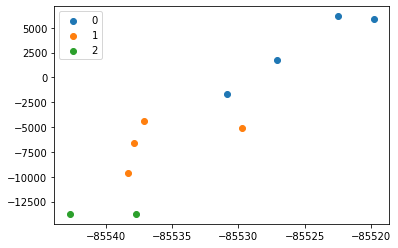

In [4]:
#Visualize the results
 
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
list_label = []
max_k = 10
for k in max_k:
    label = kmeans(df,k,300)
    